# Classification of iris flower data using Supervised learning models

## Submitted by *Ashmina T.*

**Objective:** To do the following on the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### 1. Read the dataset to the python environment.

In [2]:
#loading the dataset
iris_data = pd.read_excel('iris.xls')

In [3]:
#displaying first 5 rows
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#shape of the dataset
iris_data.shape

(150, 5)

There are 150 rows and 5 columns in the dataset.

In [5]:
#getting concise summary of the datset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


>The 5 columns in the iris datset are 'SL'(Sepal Length), 'SW'(Sepal Width), 'PL'(Petal Length), 'PW'(Petal Width), and 'Classification'.  
All the columns are of type float except the column 'Classification' which is of type object.  
Only two columns are having 150 non-null values. Other columns contains some null values.

In [6]:
#checking class distribution
iris_data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

The dataset contains features of three species of Iris flower (Iris-setosa, Iris-versicolor, Iris-virginica). The total records is 150 and each class is having 50 records.

### 2. Do necessary pre-processing steps.

In [7]:
#checking for null values
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are 19 missing values in the iris dataset. 7 in 'SL' column and 6 each in 'SW' and 'PL' columns.

#### Handling Missing Data

Missing data can be handled in two ways:  
1. Removing rows/columns with missing data.  
2. Replacing missing values with some non-null values.  

As our dataset is so small, we can't delete the records with missing values. So we have to substitute the missing values with some values.  
We can impute missing values using sci-kit learn's iterative imputer class.

In [8]:
#label encoding on Classification column
label_encoder = preprocessing.LabelEncoder()
iris_data['Classification'] = label_encoder.fit_transform(iris_data['Classification'])
#checking if the label encoding worked or not
iris_data['Classification'].unique()

array([0, 1, 2])

Label encoding is done perfectly. 0 indicates the species 'Iris-setosa', 1 indicates the species 'Iris-virginica', and 2 indicates the species 'Iris-versicolor'.

In [9]:
#iterative imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imputer = IterativeImputer(imputation_order='descending')
#fitting the data
imputer.fit(iris_data)
#transforming the data
iris_data = pd.DataFrame(imputer.transform(iris_data).round(1),columns=iris_data.columns)

In [10]:
#checking for null values
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

There are no more missing values in the dataset.  
  
Now, we have to check whether there is any outliers in the dataset. We can use box plots for this purpose.

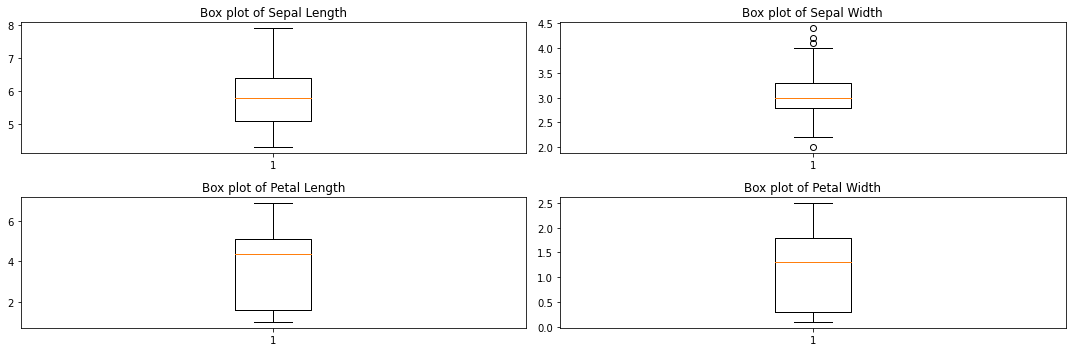

In [11]:
#boxplot
plt.figure(figsize = (15,5))

#boxplot for SL column
plt.subplot(2,2,1)
plt.boxplot(iris_data['SL'])
plt.title('Box plot of Sepal Length')

#boxplot for SW column
plt.subplot(2,2,2)
plt.boxplot(iris_data['SW'])
plt.title('Box plot of Sepal Width')

#boxplot for PL column
plt.subplot(2,2,3)
plt.boxplot(iris_data['PL'])
plt.title('Box plot of Petal Length')

#boxplot for PL column
plt.subplot(2,2,4)
plt.boxplot(iris_data['PW'])
plt.title('Box plot of Petal Width')

plt.tight_layout()
plt.show()

The column 'SW' is containing outliers.

#### Handling outliers

We are going to detect outliers using IQR(Inter Quartile Range) method.

In [12]:
sepalWidth = iris_data['SW']

#finding quartiles
q1 = np.percentile(sepalWidth,25)
q3 = np.percentile(sepalWidth,75)

#calculating inter quartile range
IQR = q3-q1

#calculating lower and upper limits
lower = q1-1.5*IQR
upper = q3+1.5*IQR

#removing values outside the limits(outliers)
#identifying the outlier
outlier = []
for x in sepalWidth:
    if ((x>upper) or (x<lower)):
        outlier.append(x)
print("Outliers:",outlier)
outlier_indx = iris_data.loc[(iris_data['SW']>upper) | (iris_data['SW']<lower)].index
print("Index of outliers:",outlier_indx)

Outliers: [4.4, 4.1, 4.2, 2.0]
Index of outliers: Int64Index([15, 32, 33, 60], dtype='int64')


In [13]:
#displaying the records containing outliers
iris_data.loc[[15,32,33,60]]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0.0
32,5.2,4.1,1.5,0.1,0.0
33,5.5,4.2,1.4,0.2,0.0
60,5.0,2.0,3.5,1.0,1.0


There are four outliers in the feature 'SW'.  
Some of the methods for treating the outliers are:  
1. Trimming/removing the outlier.  
2. Quantile based flooring and capping.  
3. Imputation.  

As our dataset is small, deleting the records with outliers is not ideal. We can do quantile based flooring and capping. In thi technique, the data points that are lesser than lower limit(q1-1.5\*IQR) are replaced with the lower limit value and the data points that are greater than upper limit(q3+1.5\*IQR) are replaced with the upper limit value.

Text(0.5, 1.0, 'Box plot of Sepal Width')

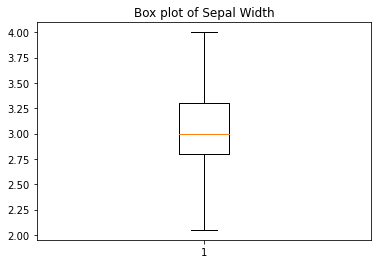

In [14]:
#quantile based flooring and capping
#capping/flooring the outlier at the upper and lower limits
iris_data['SW'] = np.where(iris_data['SW']>upper,np.round(upper,1),
                                     np.where(iris_data['SW']<lower,np.round(lower,2),iris_data['SW']))
#checking if the outliers are handled successfully or not
plt.boxplot(iris_data['SW'])
plt.title('Box plot of Sepal Width')


### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

To create a model, first we have to split the columns into feature matrix and target vector.

In [15]:
#target vector
y = iris_data['Classification']

#feature matrix
X = iris_data.drop('Classification',axis=1)

In [16]:
#statisical summary of the feature matrix
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.845333,3.051000,3.758000,1.198667
std,0.822469,0.413305,1.765146,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


Here the minimum, maximum,mean, and standard deviation values are different for all the four features. So to make a better model we should do feature scaling.  
Feature scaling can be done in two ways:  
1. Min max scaler  
2. Standard scaler  

Here we can do standard scaling, so that all the feature has distribution with zero mean value and variance 1.

In [17]:
#standard scaling
#creating an instance of standard scaler
standardisation = preprocessing.StandardScaler()
#applying standard scaling on X
standardised_X = standardisation.fit_transform(X)
#converting into dataframe
X = pd.DataFrame(standardised_X, columns = X.columns)

#checking statistical summary again
X.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,7.372806e-16,5.634382e-16,1.250851e-16,9.251859e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.885191e+00,-2.430053e+00,-1.567711e+00,-1.444450e+00
25%,-9.092509e-01,-6.093340e-01,-1.226657e+00,-1.181504e+00
50%,-5.530327e-02,-1.238089e-01,3.365066e-01,1.332259e-01
75%,6.766518e-01,6.044787e-01,7.628240e-01,7.905908e-01
max,2.506539e+00,2.303817e+00,1.785986e+00,1.710902e+00


Now we have to split the entire dataset into training set and testing set. We are going to take 20% of the dataset as testing set.

In [18]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

In [19]:
X_train.shape

(120, 4)

120 records are taken as training set and remaining 30 records as testing set.

There are many supervised learning models. We are going to implement logistic regression, KNN, SVM, Decision Tree classifier, and Random forest classifier.

#### Logistic Regression

By default, logistic regression cannot be used for classification tasks that have more than two class labels, so-called multi-class classification. The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” argument to "multinomial" and the "solver" argument to a solver that supports multinomial logistic regression, such as "lbfgs"

In [20]:
#logistic regression
from sklearn.linear_model import LogisticRegression
#creating an instance of the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#training the model
logistic_model.fit(X_train,y_train)
#testing the model
y_pred = logistic_model.predict(X_test)

In [21]:
#measuring performance
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print("Accuracy is:",accuracy_score(y_test,y_pred))


Accuracy is: 0.9666666666666667


In [22]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

There is 1 mis-classification.

#### KNN(K-Nearest Neighbours)

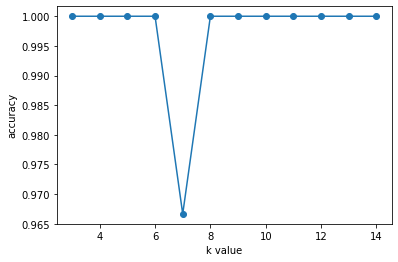

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_scores = []
#to find optimum k value, we have to use varied k values
neighbors = np.arange(3,15)
#creating a loop for each KNN values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

#checking for which k value we got highest accuracy
plt.plot(neighbors,acc_scores,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

Highest accuracy is 1.

In [24]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There are no mis-classifications. KNN classified the test data perfectly.

#### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
#training the model
dt_model.fit(X_train,y_train)
#testing the model
y_pred = dt_model.predict(X_test)

In [26]:
#measuring performance
print("Accuracy is:",accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [27]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There is no mis-classification. Decision tree classifier also classified the test data perfectly.

### Linear SVM

In [28]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
#training the model
svm_linear.fit(X_train, y_train)
#testing the model
y_pred = svm_linear.predict(X_test)

In [29]:
#measuring performance
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [30]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

There is 1 mis-classification.

#### Polynomial SVM

In [31]:
svm_poly = SVC(kernel='poly', degree=3)
#training the model
svm_poly.fit(X_train,y_train)
#testing the model
y_pred_p = svm_poly.predict(X_test)

In [32]:
#measuring performance
print('Accuracy is:', accuracy_score(y_test, y_pred))

Accuracy is: 0.9666666666666667


In [33]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

There is 1 mis-classification.

#### SVM with Radial Basis Function

In [34]:
svm_rbf = SVC(kernel='rbf')
#training the model
svm_rbf.fit(X_train, y_train)
#testing the model
y_pred = svm_rbf.predict(X_test)

In [35]:
#measuring performance
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 1.0


In [36]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There is no mis-classification. Radial SVM also classified the test data perfectly

#### Random Forest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
#training the model 
rf_model.fit(X_train,y_train)
#testing the model
y_pred = rf_model.predict(X_test)

In [38]:
#measuring performance
print('Accuracy is', accuracy_score(y_test, y_pred))

Accuracy is 1.0


In [39]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

There is no mis-classification. so, random forest classifier also classified the data perfectly.

**Conclusion**: Out of all the models implemented, Random Forest, KNN, Radial SVM and Decision Tree classifier gave the best results. They all predicted the data with 100% accuracy